In [ ]:
import os
import sys
from pathlib import Path
import numpy as np
repo_root = Path.cwd().parent
sys.path.append(str(repo_root))

folder_name = os.path.join(r'\\10.229.121.108','Workspace','PAT LINEAR','PATDOTUS','01')
from src.load_data_utils import list_subfolders, linear_us_param
from src.us_utils import pe_das_linear, nakagami_linear
import matplotlib.pyplot as plt

all_folders = list_subfolders(folder_name)
print(f"Found {len(all_folders)} image folders")
info = linear_us_param()

Found 31 image folders


(2304, 64, 192)


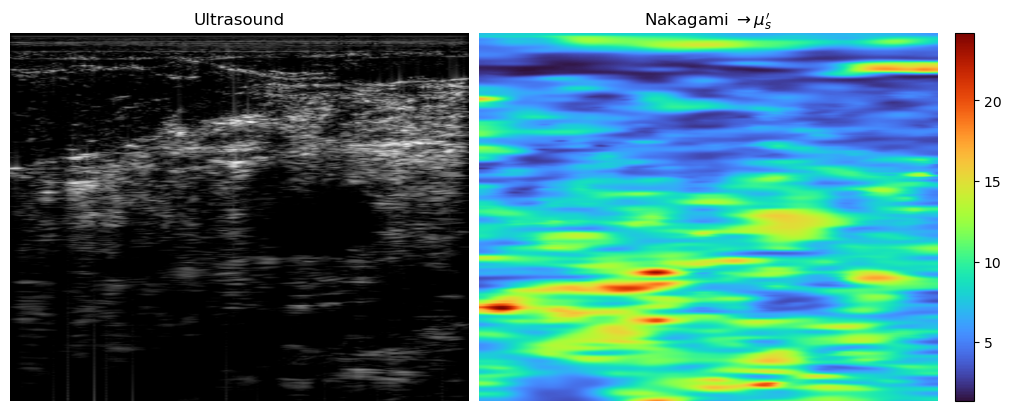

In [ ]:
input_dir = all_folders[24]
dB_US = 75
apod_method = 'hann'
coherence_method = 'gsf'
Z_display = 4e-2
RF_Sum, RF_env_raw, US_img = pe_das_linear(input_dir, info, dB_US, apod_method, coherence_method)

naka_img, naka_plot = nakagami_linear(RF_env_raw, info)
zmax_idx = int(Z_display / np.max(info.d_sample) * US_img.shape[0])

US_img_plot = US_img[0:zmax_idx,:]
naka_plot = naka_plot[0:zmax_idx,:]
naka_scaled = naka_plot * (7.8/np.median(naka_plot))

fig, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
axes[0].imshow(US_img[0:zmax_idx, :], cmap='gray', aspect='auto')
axes[0].set_title('Ultrasound', fontsize=12)
axes[0].axis('off')
im = axes[1].imshow(naka_scaled, cmap='turbo', aspect='auto')
axes[1].set_title(r"Nakagami $\rightarrow \mu_s^{\prime}$", fontsize=12)
axes[1].axis('off')
cbar = fig.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=10)